<a href="https://colab.research.google.com/github/lotusneera/Generating-Jokes/blob/master/W2V_Approach_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 26 20:12:21 2019

@author: neerajLotus
"""

import pandas as pd
import nltk 
import warnings
import gensim
from gensim import corpora,similarities,models
from gensim.models import Word2Vec
warnings.filterwarnings('ignore')


In [0]:
from gensim import *

In [0]:
from sklearn.neighbors import KDTree

In [0]:
import time,random

In [0]:
from google.colab import files
uploaded = files.upload()

Saving shortjokes.csv to shortjokes.csv


In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
test_data = pd.read_csv('shortjokes.csv')
corpus = test_data['Joke'].values.tolist()
token_corpus = [nltk.word_tokenize(sent) for sent in corpus]

In [0]:
model = Word2Vec(token_corpus,min_count=1,size=128)

In [0]:
len(model.wv.vocab.keys())

112751

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Template_One_Data.xlsx to Template_One_Data.xlsx


In [0]:
#data from temoplate one
temp_one = pd.read_excel('Template_One_Data.xlsx')

In [0]:
temp_one.columns

Index(['x', 'y', 'z', 'score', 'incomprehensibleMarkings',
       'offensiveMarkings'],
      dtype='object')

In [0]:
a = temp_one['x'][95]
b = temp_one['y'][95]
c = temp_one['z'][95]
list_words = []
for w in nltk.word_tokenize(c):
  list_words.append(w)


In [0]:
print(a,b)

pigeons airplanes


In [0]:
def remove_non_ascii(text):
  return ''.join(i for i in text if ord(i) > 64 and ord(i) < 91 or ord(i) > 96 and ord(i) < 123)

In [0]:
new_list = []
for text in list_words:
  text = remove_non_ascii(text)
  new_list.append(text)

In [0]:
new_list

['flying', 'above', 'someone', 'else', 's', 'house']

In [0]:
from nltk.corpus import stopwords 

In [0]:
stop_words = set(stopwords.words('english')) 

In [0]:
min = 0;
word = ""
for each in new_list:
    if each not in stop_words:
        try:
            
            dis = model.similarity(a, each) + model.similarity(b, each)
            dis = dis/2
            # print(dis)
            if dis > min:
              min = dis
              word = each
        except:
            pass
#print(model.most_similar(word))
print("original joke - ")
for tokens in model.most_similar(word):
  print("I like my " + a +  " like I like my " + b +", " + tokens[0])

flying
someone
else
house
[('hijacked', 0.6530417203903198), ('hurtled', 0.6521786451339722), ('crash', 0.6415955424308777), ('plane', 0.6403029561042786), ('wandering', 0.6391515135765076), ('hopping', 0.6337152719497681), ('frying', 0.6296431422233582), ('flightoplankton', 0.6267178654670715), ('crashes', 0.6218504905700684), ('flies', 0.6179930567741394)]
I like my pigeons like I like my airplanes, hijacked
I like my pigeons like I like my airplanes, hurtled
I like my pigeons like I like my airplanes, crash
I like my pigeons like I like my airplanes, plane
I like my pigeons like I like my airplanes, wandering
I like my pigeons like I like my airplanes, hopping
I like my pigeons like I like my airplanes, frying
I like my pigeons like I like my airplanes, flightoplankton
I like my pigeons like I like my airplanes, crashes
I like my pigeons like I like my airplanes, flies


In [0]:
import numpy as np
emb = np.asarray(emb)
avg = []
for i in range(0,128):
    a = 0
    for j in range(len(emb)):
        a = a + emb[j][i]
    a = a / len(emb)
    avg.append(a)

In [0]:
avg

In [0]:
model.doesnt_match(list_words)

'and'

In [0]:
class ANNSearch:
    word2idx = {}
    idx2word = {}
    data = []

    def __init__(self, model):
        for counter, key in enumerate(model.wv.vocab.keys()):
            self.data.append(model[key])
            self.word2idx[key] = counter
            self.idx2word[counter] = key

        # leaf_size is a hyperparameter
        self.data = np.array(self.data)
        self.tree = KDTree(self.data, leaf_size=100)
        
    def search_by_vector(self, v, k=10):
        dists, inds = self.tree.query([v], k)
        print(inds)
        return zip(dists[0], [self.idx2word[idx] for idx in inds[0]])

    def search(self, query, k=10):
        vector = self.data[self.word2idx[query]]
        return self.search_by_vector(vector, k)

# Linear Search
start = time.time()
for word in list_words:
  try:
    model.most_similar(word, topn=10)
  except:
    pass
  stop = time.time()
print("time/query by (gensim's) Linear Search = %.2f ms" % (1000*float(stop-start)/len(list_words)))

# KDTree Search
search_model = ANNSearch(model)

start = time.time()
for word in list_words:
    search_model.search(word, k=10)
stop = time.time()
print("time/query by KDTree Search = %.2f ms" % (1000*float(stop-start)/len(list_words)))

time/query by (gensim's) Linear Search = 7.93 ms
[[ 271   41 1434  572 1513 2130 3492 2219 3360 5221]]
[[ 687 2371  855 1016 3139  686 3028 4131 2348 9260]]
[[13309 15846 23925 12865 10986 29710 24435 33784 28049 24930]]
[[   33  1040 10773  4609  2311  2091    29  2427  3418  2330]]
[[23260 73275 56650 90803 38112 71556 71555 46846 31759 90804]]
[[ 4046  4900 32355  7539 11338  3844 21988 15473  5945  5317]]
[[11955 18241 23206  7152 17939 18081  9886 10273 27021  8055]]
time/query by KDTree Search = 34.67 ms


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 128), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

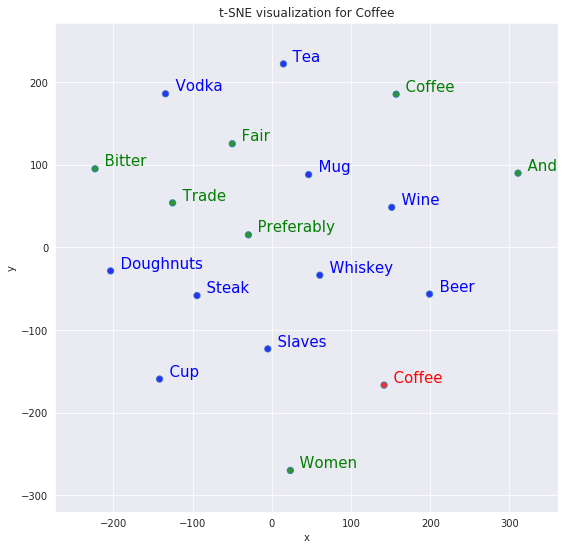

In [0]:
tsnescatterplot(model,'coffee', list_words )

In [0]:
list_jokes_template_one = temp_one.values.tolist()
ans_list = []
for a in list_jokes_template_one:
  if len(a[2].split()) == 1:
    ans_list.append(a)


In [0]:
len(ans_list)

234